In [215]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Loading the images

In [216]:
image_path = []

for root,dirs,files in os.walk('/kaggle/input/flood-area-segmentation/Image'):
    for file in sorted(files):
        path = os.path.join(root,file)
        image_path.append(path)

In [217]:
len(image_path)

290

In [218]:
mask_path = []

for root,dirs,files in os.walk('/kaggle/input/flood-area-segmentation/Mask'):
    for file in sorted(files):
        path = os.path.join(root,file)
        mask_path.append(path)

In [219]:
len(mask_path)

290

In [220]:
path.split('/')[-1].strip('.png')

'9'

In [221]:
images = []
error_files = []
for path in tqdm(image_path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
        images.append(img)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        error_files.append(path.split('/')[-1].strip('.jpg'))
        continue

  8%|▊         | 22/290 [00:00<00:02, 106.72it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/1002.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1009.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1013.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1015.jpg


 19%|█▊        | 54/290 [00:00<00:02, 102.11it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/1027.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1028.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1036.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1037.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1046.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1049.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1054.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1056.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1062.jpg


 29%|██▉       | 85/290 [00:00<00:01, 117.80it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/1068.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1074.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1077.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1078.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/1082.jpg


 40%|████      | 117/290 [00:01<00:02, 80.50it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/19.jpg


 57%|█████▋    | 165/290 [00:02<00:01, 92.15it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/22.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/28.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/30.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3008.jpg


 70%|███████   | 203/290 [00:02<00:00, 95.11it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/3019.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3023.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3025.jpg


 77%|███████▋  | 224/290 [00:02<00:00, 118.80it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/3042.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3046.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3047.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3052.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3054.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3059.jpg


 82%|████████▏ | 238/290 [00:02<00:00, 89.05it/s] 

Error decoding image : /kaggle/input/flood-area-segmentation/Image/3063.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3072.jpg


 90%|████████▉ | 260/290 [00:03<00:00, 75.34it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/3080.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3086.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3088.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/3097.jpg


 98%|█████████▊| 284/290 [00:03<00:00, 79.10it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/36.jpg
Error decoding image : /kaggle/input/flood-area-segmentation/Image/41.jpg


100%|██████████| 290/290 [00:03<00:00, 82.84it/s]

Error decoding image : /kaggle/input/flood-area-segmentation/Image/9.jpg


In [222]:
len(error_files)

41

In [223]:
masks = []

for path in tqdm(mask_path):
    try:
        if(path.split('/')[-1].strip('.png') in error_files):
            continue
        msk = tf.io.read_file(path)
        msk = tf.image.decode_image(msk, channels=1, dtype=tf.uint8)
        masks.append(msk)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        continue

100%|██████████| 290/290 [00:01<00:00, 217.42it/s]


In [224]:
len(images)

249

## Split 30 Images to Test set

In [225]:
test_images = images[220: ]
test_masks = masks[220: ]

(-0.5, 1999.5, 1332.5, -0.5)

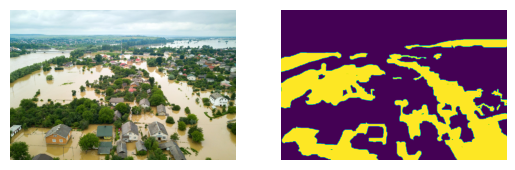

In [226]:
plt.subplot(1,2,1)
plt.imshow(test_images[0])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(test_masks[0])
plt.axis(False)

In [227]:
len(masks)

249

In [228]:
masks[0]

<tf.Tensor: shape=(551, 893, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [255],
        [ 51]],

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [203],
        [  5]],

       [[  0],
        [  0],
        [  0],
        ...,
        [255],
        [112],
        [  0]]], dtype=uint8)>

In [229]:
images = images[:220]
masks = masks[:220]

## Visualize a few images

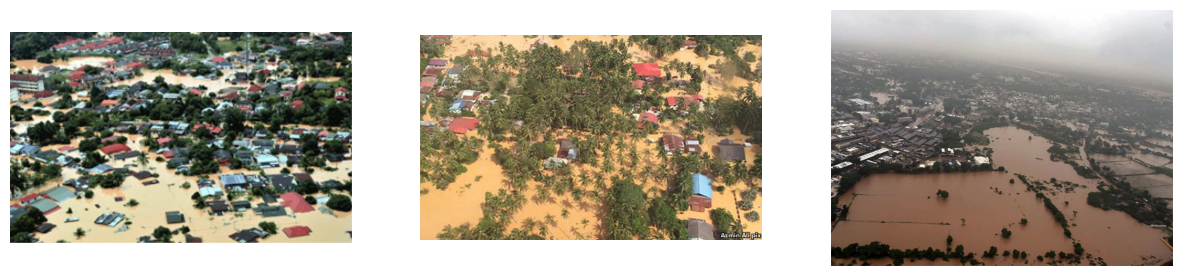

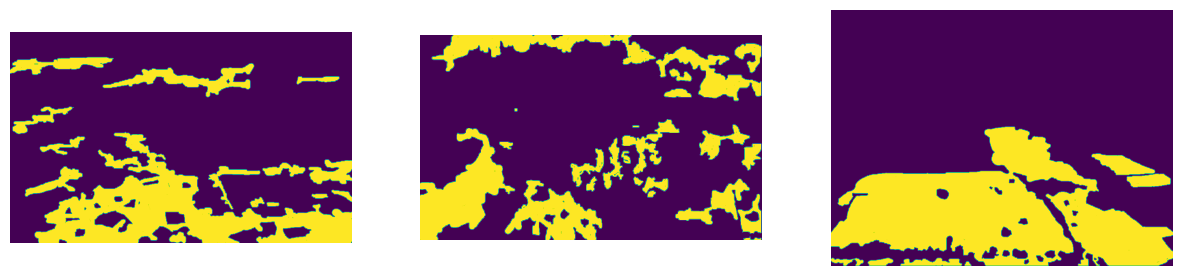

In [230]:
plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(np.squeeze(images[i]))
    plt.axis(False)
    
plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(masks[i])
    plt.axis(False)

## Data Preprocessing

### Resize images

In [231]:
def resize_image(image):
    image = np.squeeze(image)
    image = tf.cast(image, dtype = tf.float32)
    image = image/255.
    image = tf.image.resize(image, (128,128))
    return image

In [232]:
def resize_mask(mask):
    mask = tf.cast(mask, dtype = tf.float32)
    mask = mask/255.
    mask = tf.image.resize(mask, (128,128))
    return mask

In [233]:
X = [resize_image(i) for i in images] 
y = [resize_mask(i) for i in masks] 

In [234]:
len(X), len(y)

(220, 220)

# Method 1 : Without Data Augmentation

### Split into train-val dataset

In [235]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

print('X_train: ', len(X_train))
print('X_val: ', len(X_val))
print('y_train: ', len(y_train))
print('y_val: ', len(y_val))

X_train:  176
X_val:  44
y_train:  176
y_val:  44


In [236]:
X_train[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.24236104, 0.27014148, 0.41557905],
        [0.35080242, 0.39864203, 0.437368  ],
        [0.13430548, 0.18920743, 0.13822705],
        ...,
        [0.02501257, 0.09446292, 0.08886336],
        [0.05082769, 0.14047253, 0.15775949],
        [0.04106398, 0.15550944, 0.14726025]],

       [[0.06960007, 0.23027691, 0.14693628],
        [0.07335792, 0.22143507, 0.16072664],
        [0.08775575, 0.20731884, 0.13673061],
        ...,
        [0.05148004, 0.10151894, 0.10758512],
        [0.        , 0.06083099, 0.08154908],
        [0.00980344, 0.0736899 , 0.10300975]],

       [[0.05644759, 0.13487896, 0.12901193],
        [0.00164615, 0.10400403, 0.07767718],
        [0.01203757, 0.14570326, 0.11369199],
        ...,
        [0.32212478, 0.36599422, 0.43621635],
        [0.26458097, 0.3843585 , 0.4285445 ],
        [0.09391851, 0.14915042, 0.17567953]],

       ...,

       [[0.21432687, 0.35155666, 0.10863109],
        [0.23

In [237]:
y_train[0]

<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

### Convert List to Tensor

In [238]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [239]:
X_train.element_spec, X_val.element_spec, y_train.element_spec, y_val.element_spec

(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None))

In [240]:
train = tf.data.Dataset.zip(X_train, y_train)
val = tf.data.Dataset.zip(X_val, y_val)

In [241]:
type(train)

tensorflow.python.data.ops.zip_op._ZipDataset

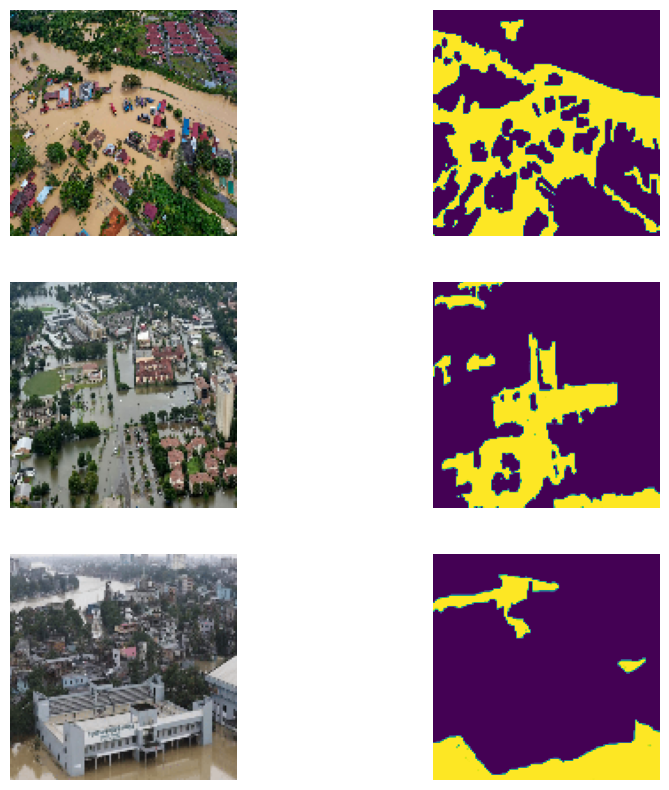

In [242]:
i = 0
plt.figure(figsize=(10,10))
for img, mask in train.take(3):
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    i+=1
    plt.axis(False)
    
    plt.subplot(3,2,i+1)
    plt.imshow(mask)
    i+=1
    plt.axis(False)

In [243]:
size = tf.data.experimental.cardinality(train)
size.numpy()

176

## Convert `tensorflow.python.data.ops.zip_op._ZipDataset` to `np.array`

In [244]:
sample = list(train.as_numpy_iterator())
img = []
msk = []
for i,j in sample:
    img.append(i)
    msk.append(j)

In [245]:
img = np.array(img)

In [246]:
img.shape

(176, 128, 128, 3)

In [247]:
len(img)

176

In [248]:
msk = np.array(msk)

In [249]:
msk.shape

(176, 128, 128, 1)

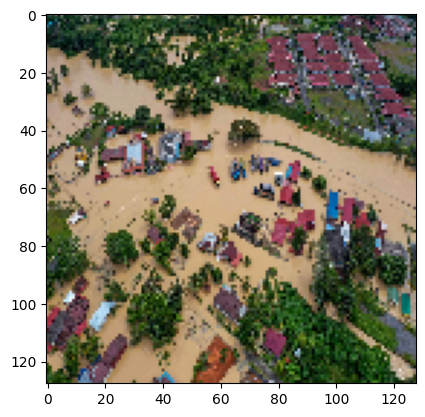

In [250]:
plt.imshow(img[0])

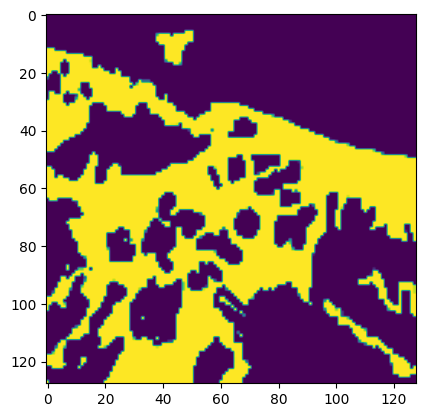

In [251]:
plt.imshow(msk[0])

In [252]:
sample = list(val.as_numpy_iterator())
val_img = []
val_msk = []
for i,j in sample:
    val_img.append(i)
    val_msk.append(j)

In [253]:
val_img = np.array(val_img)
val_img.shape

(44, 128, 128, 3)

In [254]:
val_msk = np.array(val_msk)
val_msk.shape

(44, 128, 128, 1)

# Using UNET Model

In [255]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import backend as keras

In [256]:
def unet(input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512,2,strides=(2,2),padding='same')(drop5)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(256,2,strides=(2,2),padding='same')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(128,2,strides=(2,2),padding='same')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2DTranspose(64,2,strides=(2,2),padding='same')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [257]:
model = unet()  

In [258]:
len(X_train)

176

In [259]:
len(X_val)

44

In [260]:
model.fit(img,
          msk,
          batch_size = 16,
          epochs=30,
          validation_data=(val_img,val_msk)) 

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step - accuracy: 0.4902 - loss: 0.7041 - val_accuracy: 0.5446 - val_loss: 0.6814
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.5882 - loss: 0.6854 - val_accuracy: 0.6744 - val_loss: 0.6688
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.6872 - loss: 0.6784 - val_accuracy: 0.7574 - val_loss: 0.6488
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.7535 - loss: 0.6626 - val_accuracy: 0.7309 - val_loss: 0.6169
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.7620 - loss: 0.6349 - val_accuracy: 0.8033 - val_loss: 0.5741
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.7861 - loss: 0.6162 - val_accuracy: 0.8090 - val_loss: 0.5533
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.7983 - loss: 0.5875 - val_accuracy: 0.7736 - val_loss: 0.5875
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.7726 - loss: 0.6184 - val_accuracy: 0

In [261]:
train_loss ,train_acc = model.evaluate(img,msk)
val_loss ,val_acc = model.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8407 - loss: 0.5595
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8460 - loss: 0.5137
Training loss = 0.55
Training accuracy = 0.84 
Validation loss = 0.51 
Validation accuracy = 0.85 


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.8501 - loss: 0.3280 - val_accuracy: 0.8589 - val_loss: 0.3016

## Predict for test images

In [262]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

(29, 128, 128, 3)

In [263]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

(29, 128, 128, 1)

In [264]:
y_pred = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


In [265]:
y_pred.shape

(29, 128, 128, 1)

## Visualizing the predictions

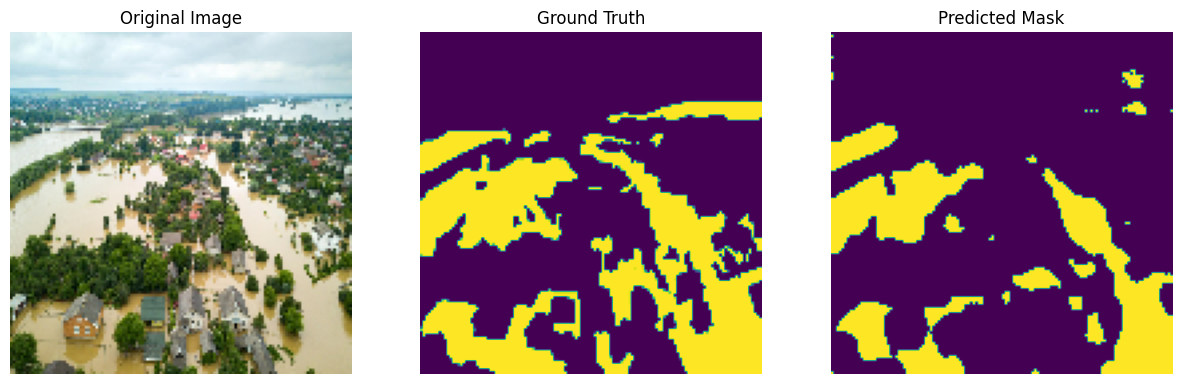

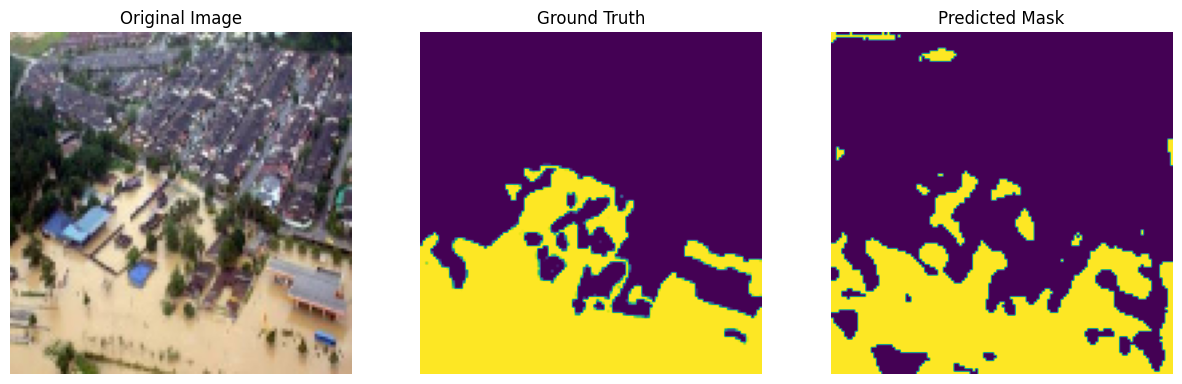

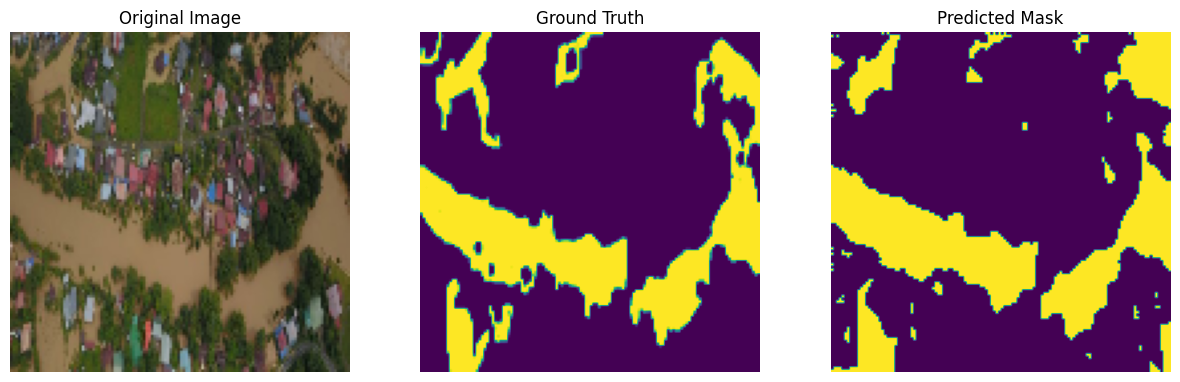

In [266]:
for i in range(3):

    plt.figure(figsize=(15,15))
    
    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)
    

# Method 2 - Applying Data Augmentation

In [267]:
def brightness(image,mask):
    img = tf.image.adjust_brightness(image, 0.1)
    return img,mask

def gamma(image,mask):
    img = tf.image.adjust_gamma(image, 0.1)
    return img,mask

def hue(image,mask):
    img = tf.image.adjust_hue(image, -0.1)
    return img,mask

In [268]:
def crop(image, mask):
    img = tf.image.central_crop(image,0.7)
    img = tf.image.resize(img, (128,128))
    mask = tf.image.central_crop(mask, 0.7)
    mask = tf.image.resize(mask, (128,128))
    return img, mask

def flip_horizontal(image,mask):
    img = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)
    return img, mask

def flip_vertical(image, mask):
    img = tf.image.flip_up_down(image)
    mask = tf.image.flip_up_down(mask)
    return img, mask

def rotate(image, mask):
    img = tf.image.rot90(image)
    mask = tf.image.rot90(mask)
    return img, mask

In [269]:
train_augmented = tf.data.Dataset.zip(X_train, y_train)

In [270]:
a = train_augmented.map(brightness)
b = train_augmented.map(gamma)
c = train_augmented.map(hue)
d = train_augmented.map(crop)
e = train_augmented.map(flip_horizontal)
f = train_augmented.map(flip_vertical)
g = train_augmented.map(rotate)

In [271]:
train_augmented = train_augmented.concatenate(a)
train_augmented = train_augmented.concatenate(b)
train_augmented = train_augmented.concatenate(c)
train_augmented = train_augmented.concatenate(d)
train_augmented = train_augmented.concatenate(e)
train_augmented = train_augmented.concatenate(f)

In [272]:
sample = list(train_augmented.as_numpy_iterator())
train_img_augmented = []
train_msk_augmented = []
for i,j in sample:
    train_img_augmented.append(i)
    train_msk_augmented.append(j)

In [273]:
train_img_augmented = np.array(train_img_augmented)
train_msk_augmented = np.array(train_msk_augmented)

In [274]:
train_img_augmented.shape

(1232, 128, 128, 3)

In [275]:
train_msk_augmented.shape

(1232, 128, 128, 1)

In [276]:
val_img.shape

(44, 128, 128, 3)

In [277]:
val_msk.shape

(44, 128, 128, 1)

## Fit the model

In [278]:
model_augmented = unet()

In [279]:
model_augmented.fit(train_img_augmented,
          train_msk_augmented,
          batch_size = 32,
          epochs=30,
          validation_data=(val_img,val_msk)) 

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 515ms/step - accuracy: 0.5607 - loss: 0.6669 - val_accuracy: 0.5259 - val_loss: 0.5776
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 338ms/step - accuracy: 0.6050 - loss: 0.5706 - val_accuracy: 0.8231 - val_loss: 0.5335
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 343ms/step - accuracy: 0.7196 - loss: 0.5578 - val_accuracy: 0.7996 - val_loss: 0.5173
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 343ms/step - accuracy: 0.7282 - loss: 0.5371 - val_accuracy: 0.8137 - val_loss: 0.5046
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 341ms/step - accuracy: 0.7461 - loss: 0.5274 - val_accuracy: 0.7849 - val_loss: 0.5149
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.7420 - loss: 0.5295 - val_accuracy: 0.8270 - val_loss: 0.4946
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.7907 - loss: 0.5023 - val_accuracy: 0.8444 - val_loss: 0.4866
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.8017 - loss: 0.4866 - val_accu

In [280]:
train_loss ,train_acc = model_augmented.evaluate(train_img_augmented,train_msk_augmented)
val_loss ,val_acc = model_augmented.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9078 - loss: 0.1800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8591 - loss: 0.3641
Training loss = 0.19
Training accuracy = 0.90 
Validation loss = 0.34 
Validation accuracy = 0.86 


In [281]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

(29, 128, 128, 3)

In [282]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

(29, 128, 128, 1)

In [283]:
y_pred = model_augmented.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


In [284]:
y_pred.shape

(29, 128, 128, 1)

## Visualizing the predictions

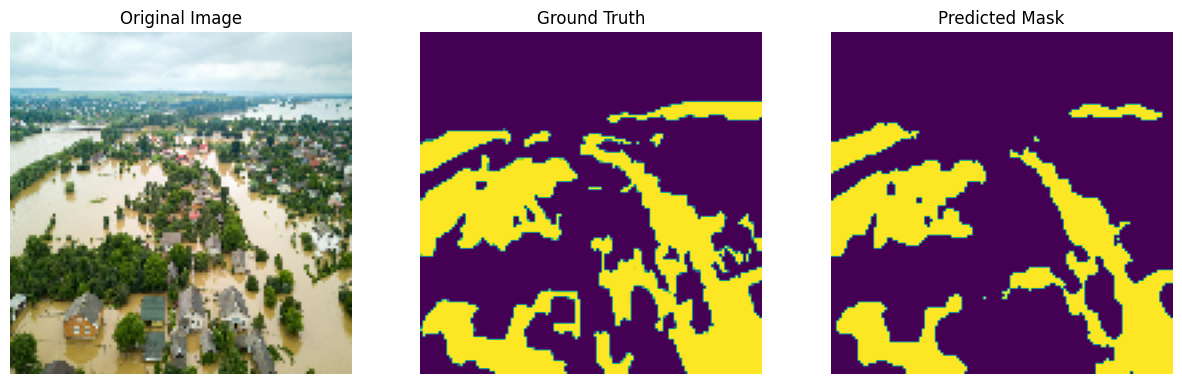

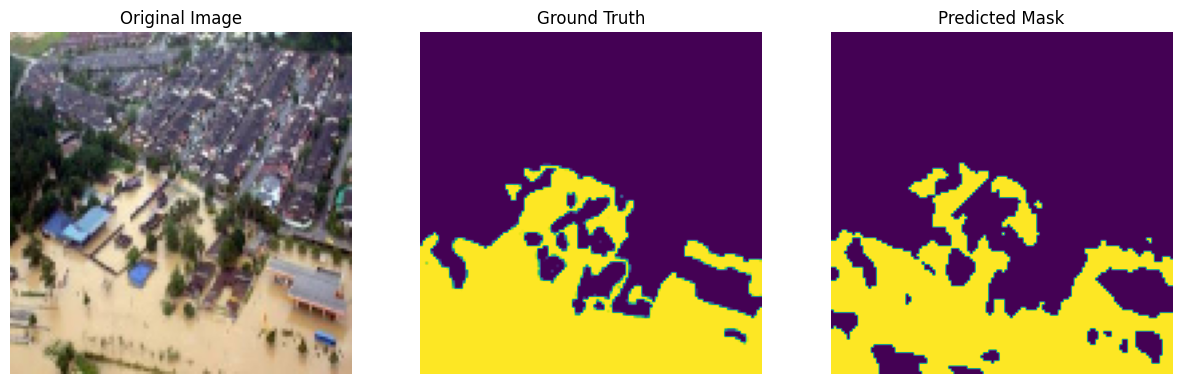

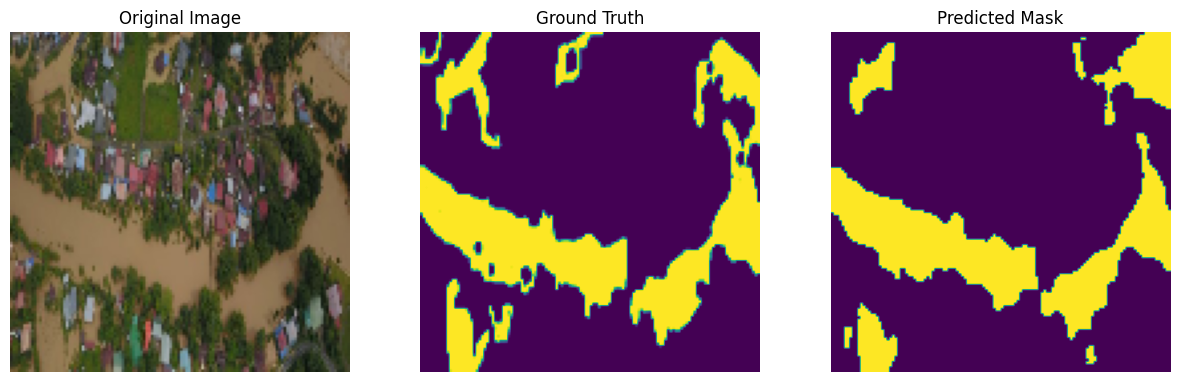

In [286]:
for i in range(3):

    plt.figure(figsize=(15,15))
    
    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)
    